<KeysViewHDF5 ['H0', 'Hnames', 'Hops', 'U', 'convergence', 'error', 'initial_guess', 'initial_vectors_c', 'inter_vecs_imag', 'inter_vecs_mag_squared', 'inter_vecs_raw_imag', 'inter_vecs_raw_real', 'inter_vecs_real', 'iteration', 'maxA', 'method', 'reg_coeffs', 'reg_error', 'run_time', 'sparse_H', 'sparse_K', 'sparse_U', 'states_concerned_list', 'steps', 'taylor_scaling', 'taylor_terms', 'total_time', 'uks', 'unitary_scale', 'use_gpu', 'wall_clock_time']>
0.0


C:\Users\hek\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


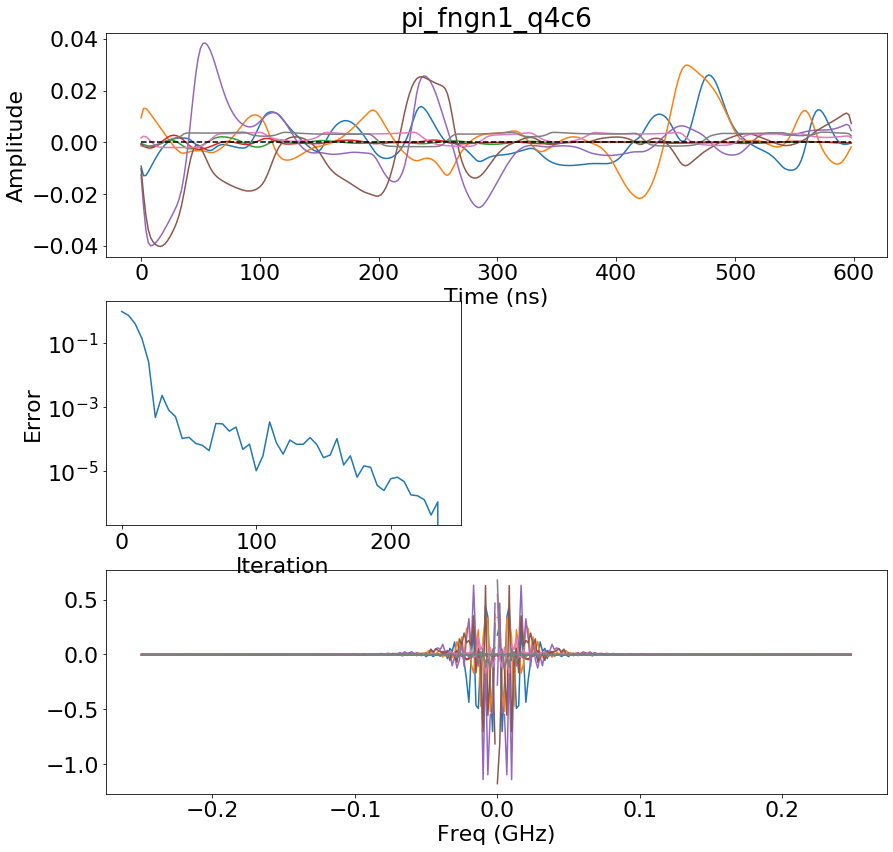

In [21]:
%matplotlib inline
from numpy import*
from pylab import*
import matplotlib.pyplot as plt
from h5py import File


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)
from slab.dsfit import*
import json


expt_name = 'binomialcode_pi_fngn1'
expt_name = 'pi_fngn1_q4c6'
filelist = [21] 
nus = []
        
        

for ii,i in enumerate(filelist):
    filename = "C:\Schuster Lab\Multimode\GRAPE-Tensorflow-Examples-master\pulses\output_pulses\\" + \
                str(i).zfill(5) + "_" + expt_name.lower()+".h5"

    with File(filename,'r') as a:
        print(a.keys())
        # get values that will be used in plotting
        # get scalar slice using [()]
        update_step = a['convergence']['update_step'][()]
        steps = a['steps'][()]
        dt = a['total_time'][()] / steps
        #print(a['wall_clock_time'][()])

        fig = plt.figure(figsize=(14,14))
        ax = fig.add_subplot(311,title = expt_name)
    
        # plot control pulses, last element is the final control pulse output
        for i in range(len(a['Hops'][()])):
            ax.plot(np.arange(0, steps) * dt, a['uks'][-1][i])
        ax.plot(np.arange(0, steps) * dt, np.zeros(steps), '--k')  # plot a line y=0 for reference
        ax.set_xlabel("Time (ns)")
        ax.set_ylabel("Amplitude")
        
        # plot Fourier transform of control pulses
        ax2 = fig.add_subplot(313)
        for i in range(len(a['Hops'][()])):
            ax2.plot(fftfreq(steps, d=dt), fft(a['uks'][-1][i]))
        ax2.set_xlabel("Freq (GHz)")
        
        # plot error
        ax3 = fig.add_subplot(323)
        ax3.semilogy(np.arange(0, len(a['error'])) * 5, a['error'])
        ax3.set_xlabel("Iteration")
        ax3.set_ylabel("Error")
        print(a['error'][-1])




In [21]:
np.arange(-3, 3)

array([-3, -2, -1,  0,  1,  2])